In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
remates = pd.read_csv('remates.csv')

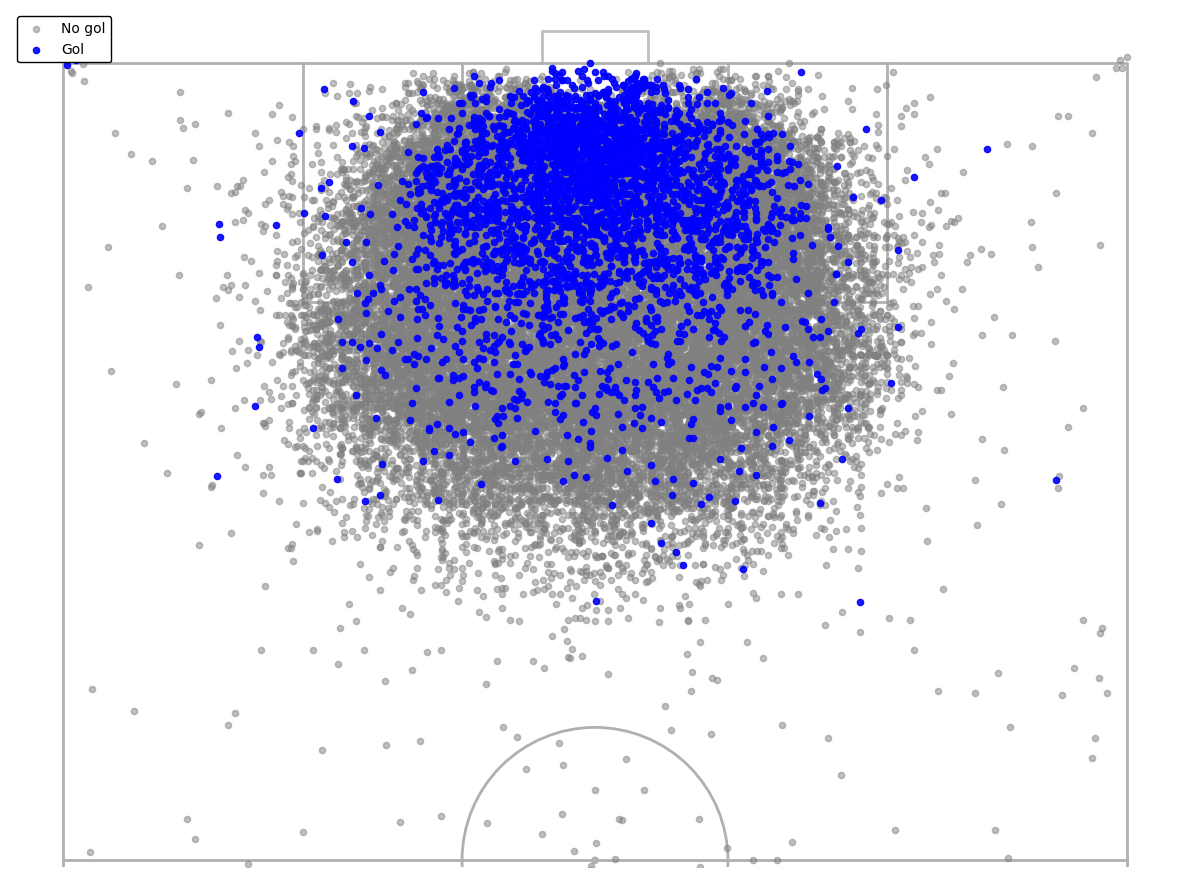

In [25]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

muestra = remates.sample(frac=1, random_state=42)

# Crear el campo vertical
pitch = VerticalPitch(pad_bottom=0.5, half=True, goal_type='box',
                      goal_alpha=0.8)

# Crear figura y ejes con fondo oscuro
fig, ax = pitch.draw(figsize=(12, 10))
fig.set_facecolor('white')
ax.set_facecolor('white')

# Scatter para no goles (goal = 0)
pitch.scatter(muestra[muestra['goal'] == 0]['x'],
              muestra[muestra['goal'] == 0]['y'],
              color='gray', s=20, alpha=0.5, ax=ax, label='No gol')

# Scatter para goles (goal = 1)
pitch.scatter(muestra[muestra['goal'] == 1]['x'],
              muestra[muestra['goal'] == 1]['y'],
              color='blue', s=20, alpha=0.9, ax=ax, label='Gol')

# Agregar leyenda
legend = ax.legend(facecolor='white', framealpha=1, edgecolor='black')
for text in legend.get_texts():
    text.set_color("black")

plt.show()


['Goal' 'Off T' 'Blocked' 'Wayward' 'Saved' 'Post' 'Saved Off Target'
 'Saved to Post']


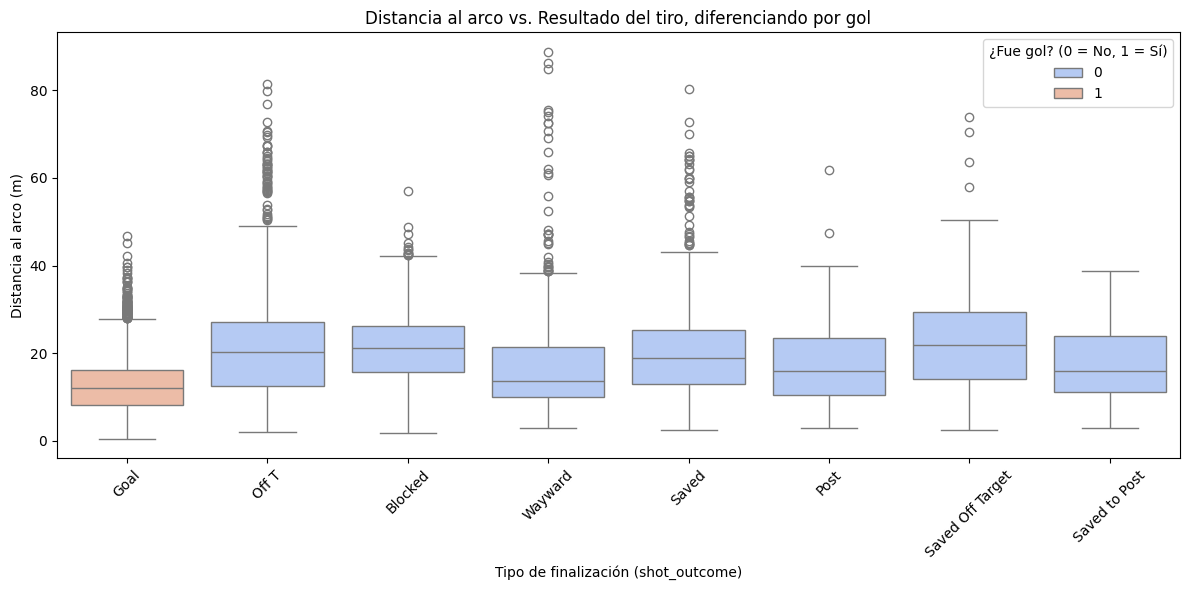

In [26]:
#Grafico de Distancia y Gol
import seaborn as sns
import matplotlib.pyplot as plt


print(remates['shot_outcome'].unique())

# Tipos de shot_utcome = 
#     'Goal': 'Gol',
#     'Off T': 'Fuera del arco',
#     'Blocked': 'Bloqueado',
#     'Wayward': 'Desviado',
#     'Saved': 'Atajado',
#     'Post': 'Al palo',
#     'Saved Off Target': 'Atajado fuera del arco',
#     'Saved to Post': 'Atajado y dio en el palo'

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=remates,
    x='shot_outcome',
    y='distance',
    hue='goal',  # diferencia por color si fue gol
    palette='coolwarm'
)

plt.title('Distancia al arco vs. Resultado del tiro, diferenciando por gol')
plt.xlabel('Tipo de finalización (shot_outcome)')
plt.ylabel('Distancia al arco (m)')
plt.legend(title='¿Fue gol? (0 = No, 1 = Sí)', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

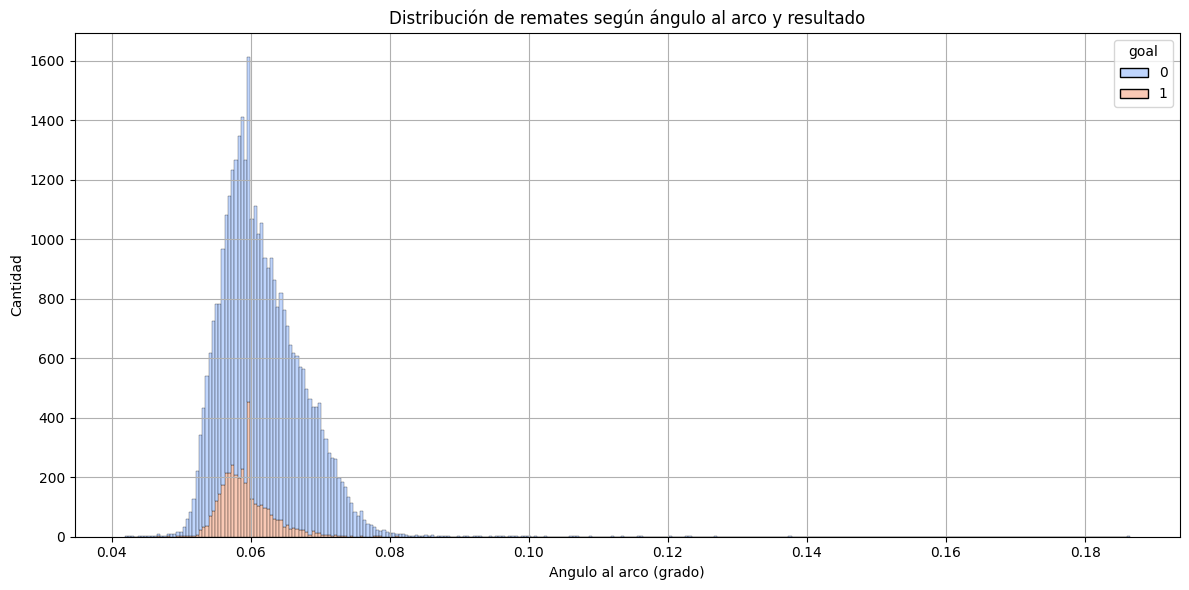

In [27]:
#Grafico de Angulo y Gol
import seaborn as sns
import matplotlib.pyplot as plt


# Graficar histograma con la muestra
plt.figure(figsize=(12, 6))
sns.histplot(data=remates, x="angle", hue="goal", multiple="stack", palette='coolwarm')

plt.title("Distribución de remates según ángulo al arco y resultado")
plt.xlabel("Angulo al arco (grado)")
plt.ylabel("Cantidad")
plt.grid(True)
plt.tight_layout()
plt.show()

Goles dentro y fuera del área:
shot_area
True     3340
False     483
Name: count, dtype: int64


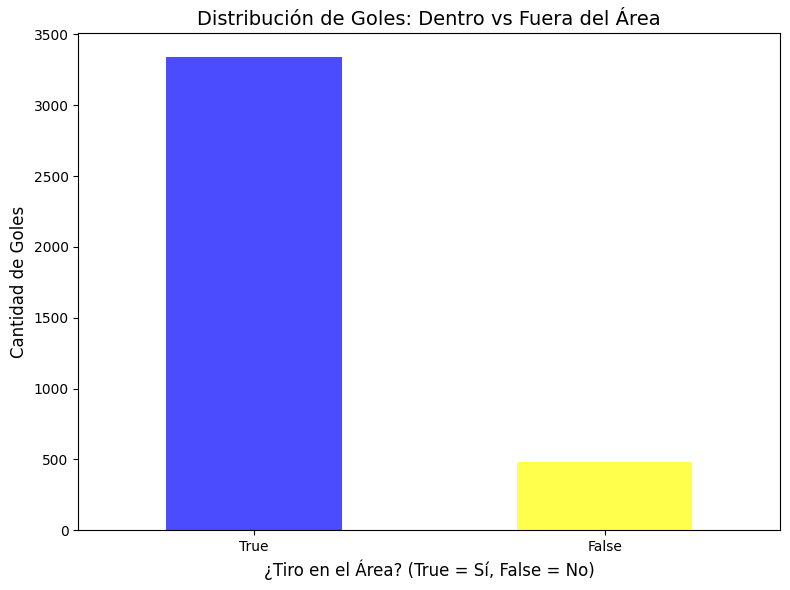

In [28]:
# Filtrar solo los remates que fueron goles
goles = remates[remates['goal'] == 1]

# Contar cuántos goles fueron dentro y fuera del área
goles_por_area = goles['shot_area'].value_counts()

# Mostrar los resultados
print("Goles dentro y fuera del área:")
print(goles_por_area)

# Visualizar con un gráfico de barras
plt.figure(figsize=(8, 6))
goles_por_area.plot(kind='bar', color=['blue', 'yellow'], alpha=0.7)
plt.title('Distribución de Goles: Dentro vs Fuera del Área', fontsize=14)
plt.xlabel('¿Tiro en el Área? (True = Sí, False = No)', fontsize=12)
plt.ylabel('Cantidad de Goles', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

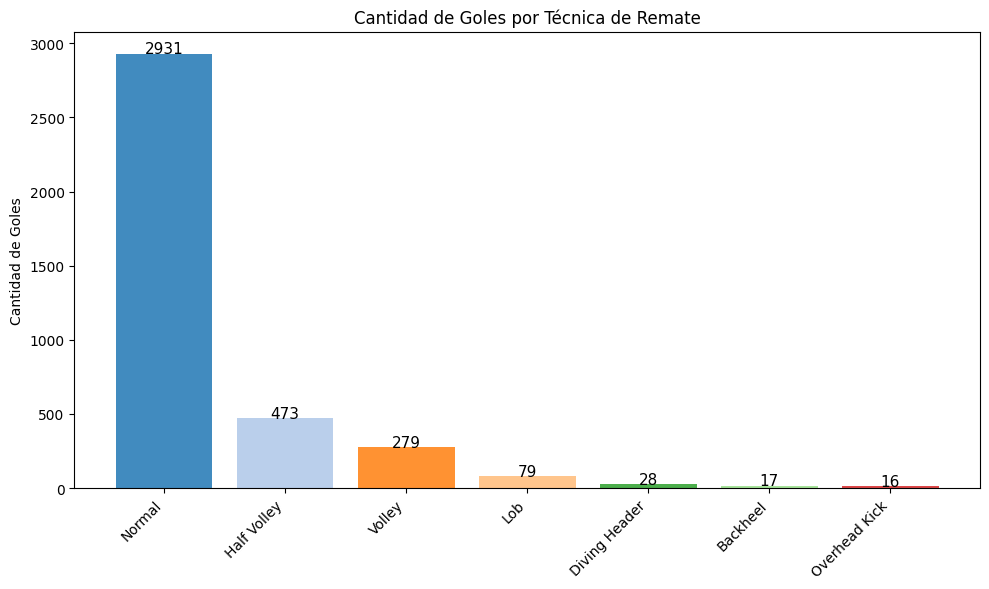

In [29]:
import matplotlib.pyplot as plt

# Filtrar solo goles
goles = remates[remates['goal'] == 1]

# Contar goles por técnica de remate
goles_por_tecnica = goles['shot_technique'].value_counts()

# Graficar barras con colores distintos
plt.figure(figsize=(10, 6))
bars = plt.bar(goles_por_tecnica.index, goles_por_tecnica.values, 
               color=plt.cm.tab20.colors[:len(goles_por_tecnica)], alpha=0.85)

# Agregar valores encima de las barras
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 1, str(int(altura)), ha='center', fontsize=11)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de Goles')
plt.title('Cantidad de Goles por Técnica de Remate')
plt.tight_layout()
plt.show()


['Left Foot' 'Right Foot' 'Head' 'Other']


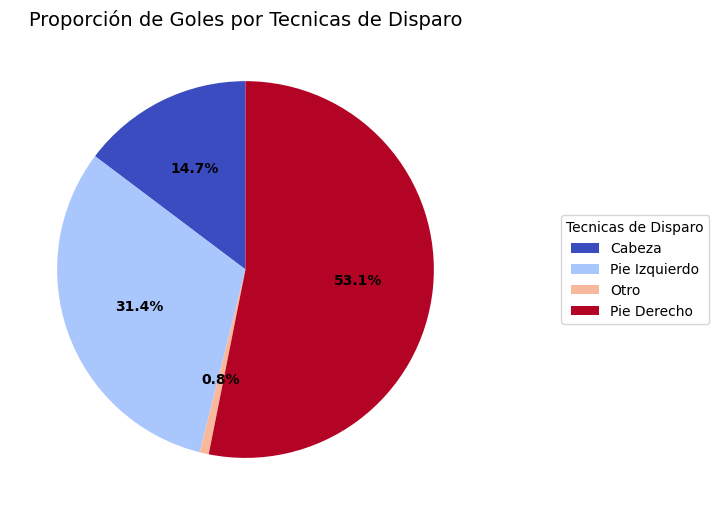

In [30]:
import matplotlib.pyplot as plt

# Traducción de las categorías al español
traducciones = {
    'Left Foot':'Pie Izquierdo',
    'Right Foot': 'Pie Derecho',
    'Head':'Cabeza',
    'Other': 'Otro'
    }


# Calcular los totales por técnica de disparo
totales = remates.groupby('shot_body_part')['goal'].sum()
print(remates['shot_body_part'].unique())


# Aplicar traducciones
totales.index = totales.index.map(traducciones)

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 8))  # Ajustar el tamaño del gráfico
wedges, texts, autotexts = ax.pie(
    totales,
    autopct='%1.1f%%',  # Mostrar porcentajes
    startangle=90,      # Rotar el inicio del gráfico
    colors=plt.cm.coolwarm(np.linspace(0, 1, len(totales)))  # Colores
)

# Agregar leyenda
ax.legend(
    wedges,
    totales.index,
    title="Tecnicas de Disparo",
    loc="center right",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Posición de la leyenda
)

# Personalizar el gráfico
plt.setp(autotexts, size=10, weight="bold")  # Personalizar los porcentajes
ax.set_title('Proporción de Goles por Tecnicas de Disparo', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

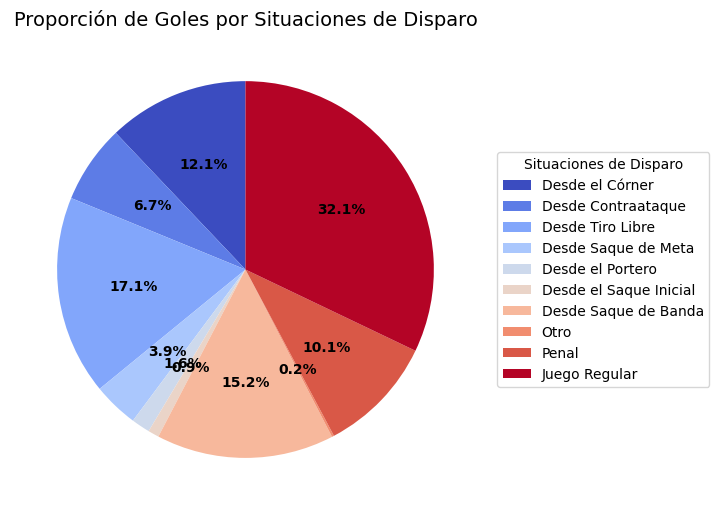

In [32]:
import matplotlib.pyplot as plt

# Traducción de las categorías al español
traducciones = {
    'Penalty': 'Penal',  # Agregado para evitar NaN
    'Other': 'Otro',
    'Regular Play': 'Juego Regular',
    'From Throw In': 'Desde Saque de Banda',
    'From Keeper': 'Desde el Portero',
    'From Corner': 'Desde el Córner',
    'From Counter': 'Desde Contraataque',
    'From Free Kick': 'Desde Tiro Libre',
    'From Goal Kick': 'Desde Saque de Meta',
    'From Kick Off': 'Desde el Saque Inicial'
}

# Calcular los totales por técnica de disparo
totales = remates.groupby('play_pattern')['goal'].sum()

# Aplicar traducciones
totales.index = totales.index.map(traducciones)

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 8))  # Ajustar el tamaño del gráfico
wedges, texts, autotexts = ax.pie(
    totales,
    autopct='%1.1f%%',  # Mostrar porcentajes
    startangle=90,      # Rotar el inicio del gráfico
    colors=plt.cm.coolwarm(np.linspace(0, 1, len(totales)))  # Colores
)

# Agregar leyenda
ax.legend(
    wedges,
    totales.index,
    title="Situaciones de Disparo",
    loc="center right",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Posición de la leyenda
)

# Personalizar el gráfico
plt.setp(autotexts, size=10, weight="bold")  # Personalizar los porcentajes
ax.set_title('Proporción de Goles por Situaciones de Disparo', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

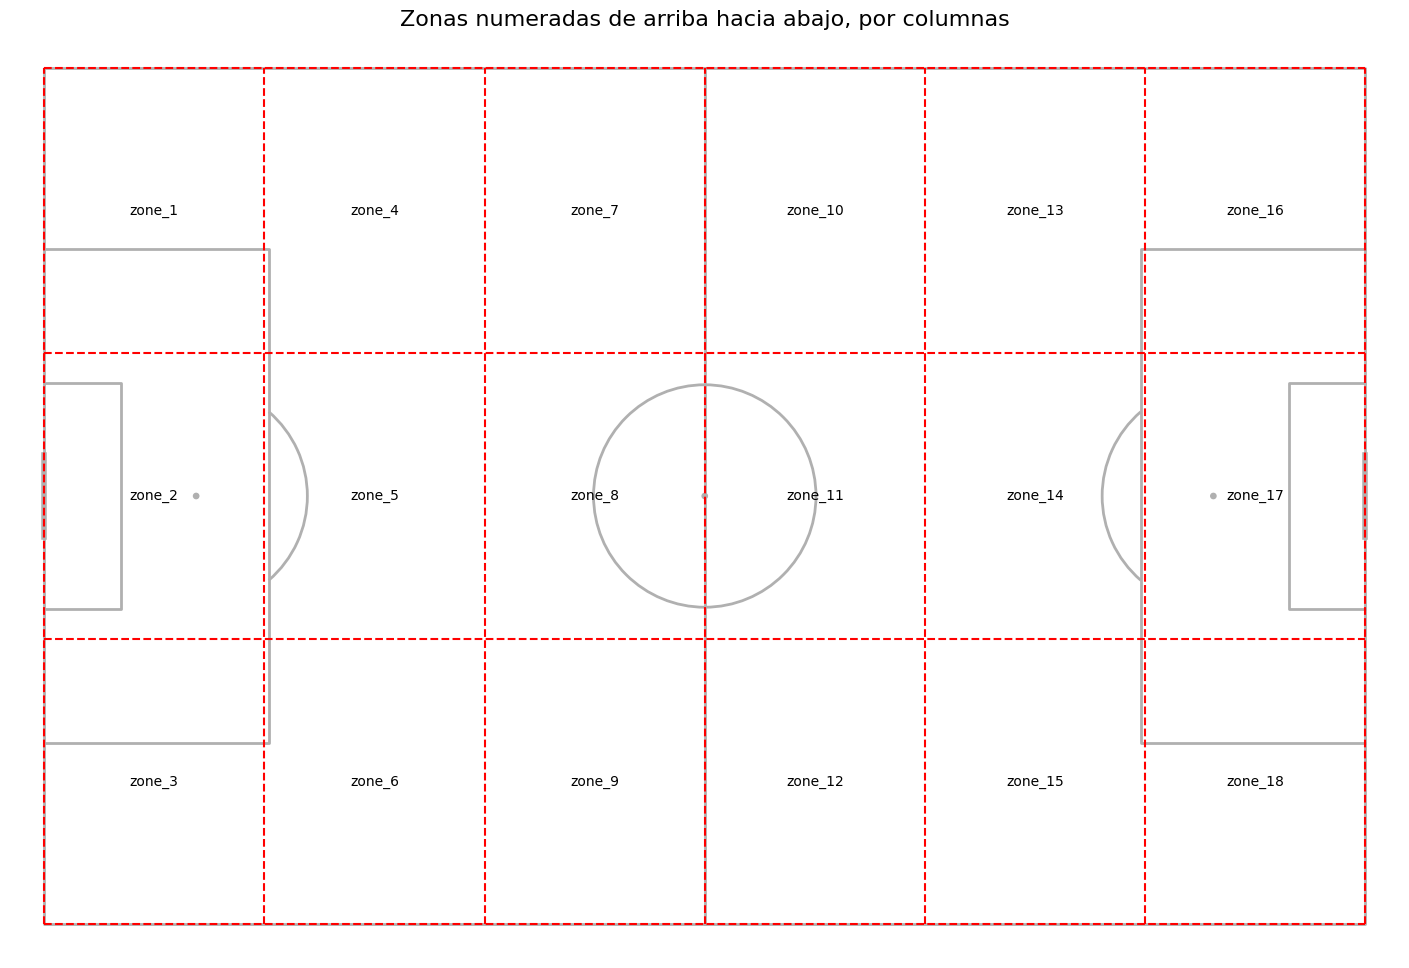

In [33]:
import numpy as np
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Crear el campo
pitch = Pitch(pitch_type='opta')

# Divisiones automáticas: 6 columnas, 3 filas
x_divisions = np.linspace(0, 100, 7)  # 6 columnas = 7 cortes
y_divisions = np.linspace(0, 100, 4)  # 3 filas = 4 cortes

# Crear zonas: de arriba hacia abajo, columna por columna
zone_areas = {}
zone_id = 1
for i in range(len(x_divisions) - 1):  # columnas de izquierda a derecha
    for j in reversed(range(len(y_divisions) - 1)):  # filas de arriba hacia abajo
        zone_areas[f'zone_{zone_id}'] = {
            'x_lower_bound': x_divisions[i],
            'x_upper_bound': x_divisions[i + 1],
            'y_lower_bound': y_divisions[j],
            'y_upper_bound': y_divisions[j + 1],
        }
        zone_id += 1

# Visualizar
fig, ax = plt.subplots(figsize=(20, 12))
pitch.draw(ax=ax)

# Etiquetas de zona
for zone, bounds in zone_areas.items():
    x_center = (bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2
    y_center = (bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2
    ax.text(x_center, y_center, zone, ha='center', va='center', fontsize=10)

# Dibujar líneas divisorias
for x in x_divisions:
    ax.plot([x, x], [0, 100], ls='--', color='red')

for y in y_divisions:
    ax.plot([0, 100], [y, y], ls='--', color='red')

plt.title("Zonas numeradas de arriba hacia abajo, por columnas", fontsize=16)
plt.show()


In [34]:
# Devuelve el nombre de la zona en la que cae el disparo según sus coordenadas x, y.
def get_shot_zone(x, y): 

    global zone_areas

    zone = next(
        (
            z for z, bounds in zone_areas.items()
            if bounds['x_lower_bound'] <= x <= bounds['x_upper_bound']
            and bounds['y_lower_bound'] <= y <= bounds['y_upper_bound']
        ),
        None  # Valor por defecto si no encuentra zona
    )
    return zone

In [35]:

# Asegúrate de que las coordenadas estén en escala Opta (0 a 100)
# Si tus datos vienen en StatsBomb (0-120 x, 0-80 y), transformalos:

# Transformar coordenadas de StatsBomb a escala Opta
remates['x_opta'] = remates['x'] * (100 / 120)  # Escalar x de 0-120 a 0-100
remates['y_opta'] = remates['y'] * (100 / 80)   # Escalar y de 0-80 a 0-100

# Aplicar la función para obtener la zona
remates['zona'] = remates.apply(lambda row: get_shot_zone(row['x_opta'], row['y_opta']), axis=1)

# Mostrar las primeras filas con las columnas relevantes
print(remates[['x', 'y', 'x_opta', 'y_opta', 'zona']].head())

       x     y     x_opta  y_opta     zona
0  108.2  40.1  90.166667  50.125  zone_17
1   91.9  43.1  76.583333  53.875  zone_14
2   90.2  59.3  75.166667  74.125  zone_13
3   95.2  47.2  79.333333  59.000  zone_14
4  113.0  59.5  94.166667  74.375  zone_16


       zona  remates_totales  goles
0   zone_10               29      1
1   zone_11               88      1
2   zone_12               22      0
3   zone_13             1222     24
4   zone_14             9231    287
5   zone_15             1405     31
6   zone_16             1907     64
7   zone_17            19376   3352
8   zone_18             1981     62
9    zone_4                1      0
10   zone_5                1      0
11   zone_6                1      0
12   zone_7                8      0
13   zone_8               30      0
14   zone_9               10      0


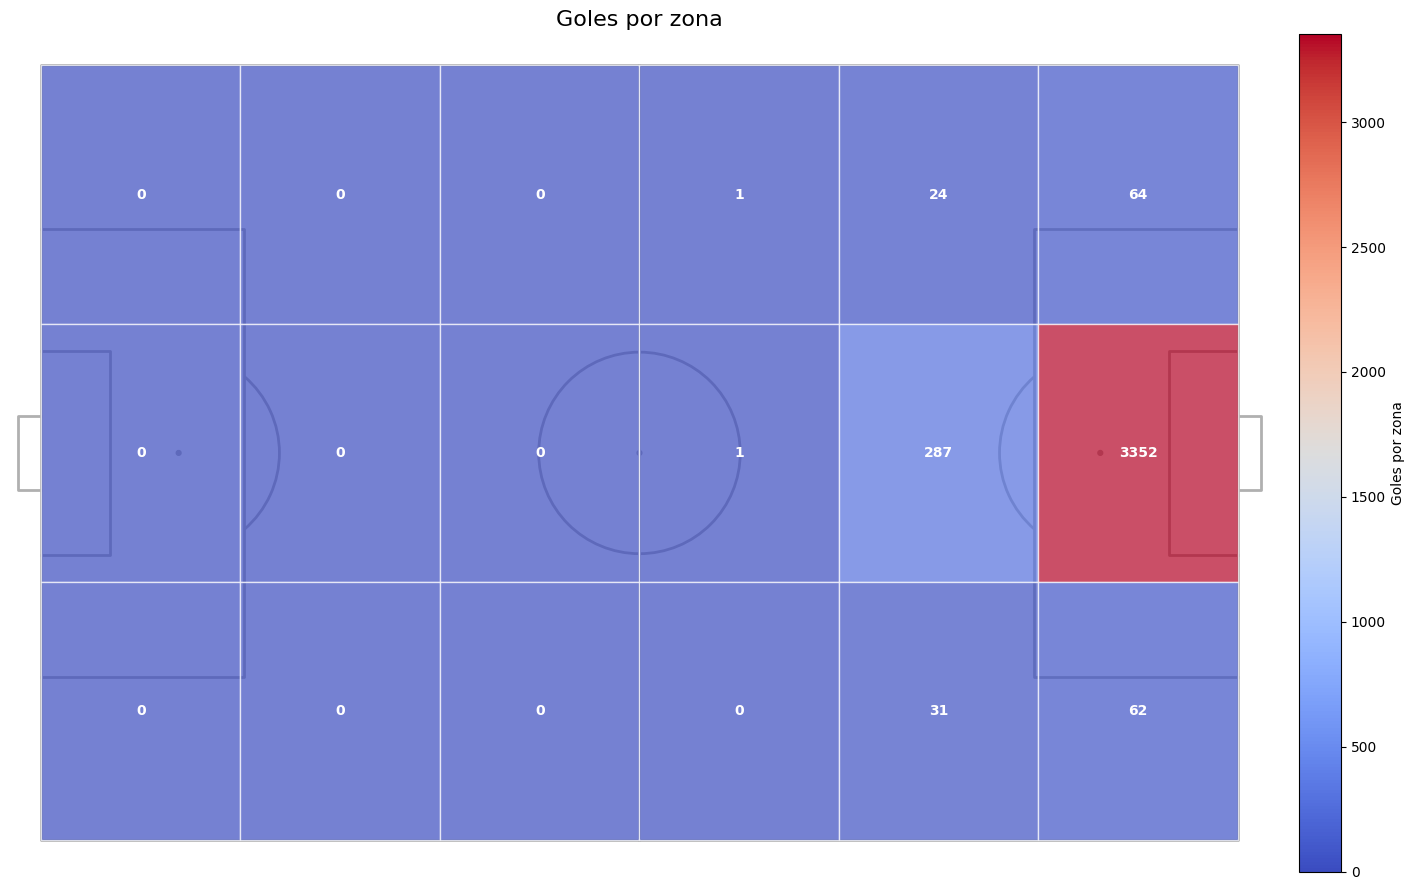

In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch

# Crear las estadísticas de goles por zona
zonas_stats = remates.groupby('zona').agg(
    remates_totales=('zona', 'count'),
    goles=('goal', 'sum')
).reset_index()

print(zonas_stats)

# Crear un diccionario para acceso rápido con los goles por zona
goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = plt.subplot(111)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map
cmap = plt.cm.coolwarm
vmin = zonas_stats['goles'].min()
vmax = zonas_stats['goles'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Pintar cada zona
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)  # Si no hay datos, usa 0
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)),
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
    
    # Texto con goles
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{goles}",
        color='white',
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Goles por zona', color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

plt.title("Goles por zona", fontsize=16)
plt.tight_layout()
plt.show()



        zona  remates_totales  goles
0    zone_14            11181    309
1   zone_17a             5705    428
2  zone_17b1             6847   1215
3  zone_17b2             6038   1444
4   zone_17c             5122    413


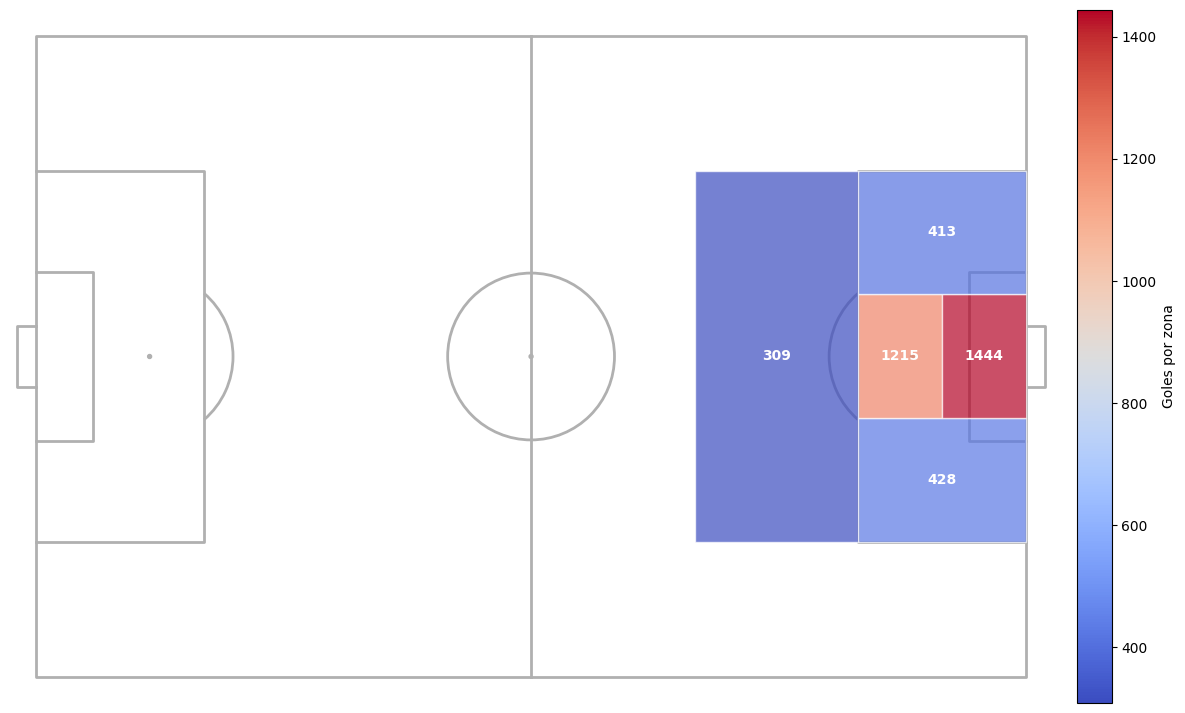

In [37]:
# Importar librerías necesarias
from statsbombpy import sb
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch, VerticalPitch

# Definir zonas del campo
zone_areas = {
    'zone_17a': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 40.43
    },
    'zone_17b1': {  # LADO IZQUIERDO
        'x_lower_bound': 83, 'x_upper_bound': 91.5,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17b2': {  # LADO DERECHO
        'x_lower_bound': 91.5, 'x_upper_bound': 100,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17c': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 59.76, 'y_upper_bound': 78.9
    },
    'zone_14': {
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9
    },
}

# Asegurate de que las coordenadas estén en escala Opta (0 a 100)
# Si tus datos vienen en StatsBomb (0-120 x, 0-80 y), transformalos:
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

# Aplicar la función para obtener la zona
remates['zona'] = remates.apply(lambda row: get_shot_zone(row['x_opta'], row['y_opta']), axis=1)
 
 
# Función para asignar zonas
def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if (x >= bounds['x_lower_bound']) and (x <= bounds['x_upper_bound']):
            if (y >= bounds['y_lower_bound']) and (y <= bounds['y_upper_bound']):
                return zone
    return 'zona desconocida'

# Crear las estadísticas de goles por zona
zonas_stats = remates.groupby('zona').agg(
    remates_totales=('zona', 'count'),
    goles=('goal', 'sum')
).reset_index()

print(zonas_stats)

# Crear un diccionario para acceso rápido con los goles por zona
goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = plt.subplot(111)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map
cmap = plt.cm.coolwarm
vmin = zonas_stats['goles'].min()
vmax = zonas_stats['goles'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Pintar cada zona
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)  # Si no hay datos, usa 0
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)),
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
    
    # Texto con goles
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{goles}",
        color='white',
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Goles por zona', color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
plt.show()


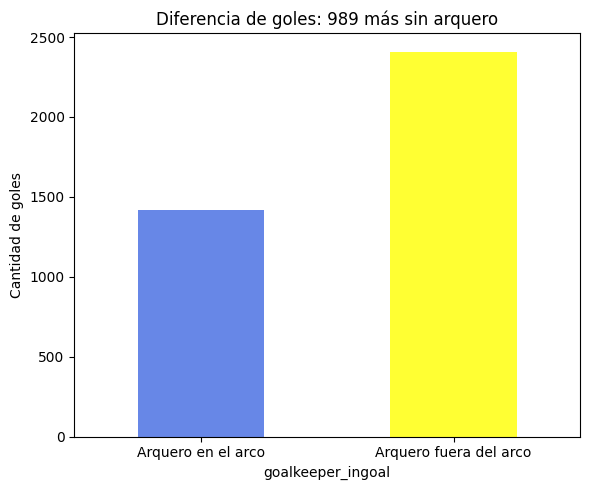

In [40]:
import matplotlib.pyplot as plt

# Contar goles según si el arquero estaba en el arco o no
goles_por_arquero = remates[remates['goal'] == 1]['goalkeeper_ingoal'].value_counts().reindex([True, False], fill_value=0)

# Calcular la diferencia
diferencia = goles_por_arquero[False] - goles_por_arquero[True]

# Gráfico de barras
plt.figure(figsize=(6, 5))
goles_por_arquero.plot(kind='bar', color=['royalblue', 'yellow'], alpha=0.8)
plt.xticks([0, 1], ['Arquero en el arco', 'Arquero fuera del arco'], rotation=0)
plt.ylabel('Cantidad de goles')
plt.title(f'Diferencia de goles: {diferencia} más sin arquero')
plt.tight_layout()
plt.show()

shot_aerial_won
True      217
False    3606
Name: count, dtype: int64


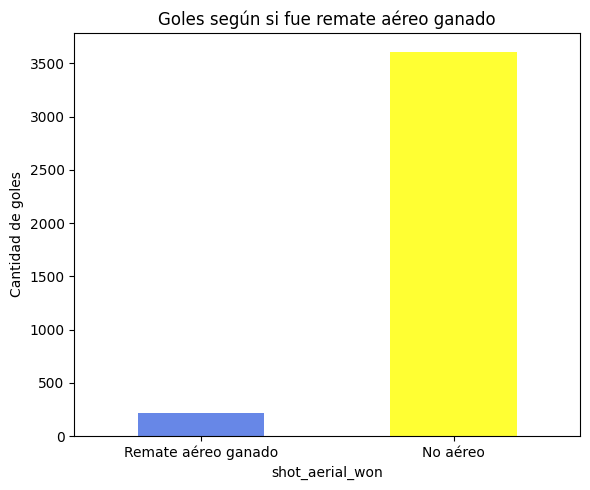

In [41]:
import matplotlib.pyplot as plt

# Filtrar solo goles y agrupar por shot_aerial_won
goles = remates[remates['goal'] == 1]

# Agrupar por shot_aerial_won (True/False)
goles_aerial = goles['shot_aerial_won'].value_counts().reindex([True, False], fill_value=0)

# Mostrar la tabla
print(goles_aerial)

# Gráfico de barras
plt.figure(figsize=(6, 5))
goles_aerial.plot(kind='bar', color=['royalblue', 'yellow'], alpha=0.8)
plt.xticks([0, 1], ['Remate aéreo ganado', 'No aéreo'], rotation=0)
plt.ylabel('Cantidad de goles')
plt.title('Goles según si fue remate aéreo ganado')
plt.tight_layout()
plt.show()

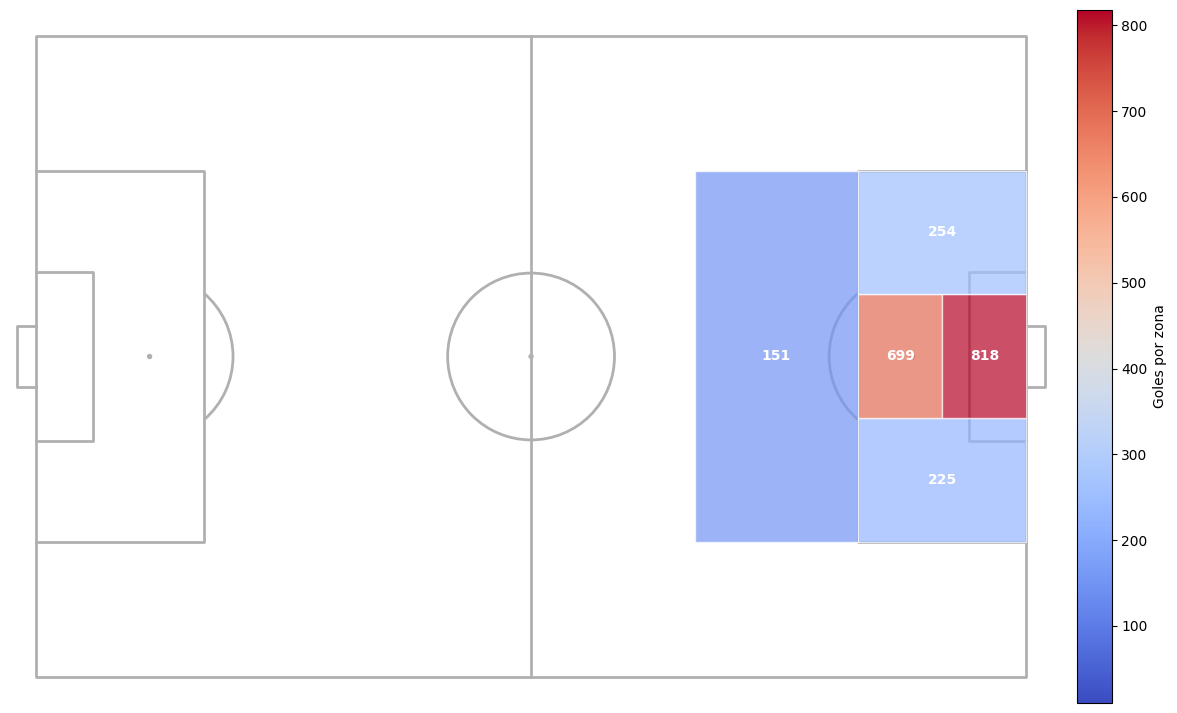

In [42]:
# Importar librerías necesarias
from statsbombpy import sb
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch, VerticalPitch

# Definir zonas del campo
zone_areas = {
    'zone_17a': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 40.43
    },
    'zone_17b1': {  # LADO IZQUIERDO
        'x_lower_bound': 83, 'x_upper_bound': 91.5,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17b2': {  # LADO DERECHO
        'x_lower_bound': 91.5, 'x_upper_bound': 100,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17c': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 59.76, 'y_upper_bound': 78.9
    },
    'zone_14': {
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9
    },
}

# Asegurate de que las coordenadas estén en escala Opta (0 a 100)
# Si tus datos vienen en StatsBomb (0-120 x, 0-80 y), transformalos:
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

 
# Función para asignar zonas
def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if (x >= bounds['x_lower_bound']) and (x <= bounds['x_upper_bound']):
            if (y >= bounds['y_lower_bound']) and (y <= bounds['y_upper_bound']):
                return zone
    return 'zona desconocida'

# Aplicar la función para obtener la zona
remates['zona'] = remates.apply(lambda row: assign_shot_zone(row['x_opta'], row['y_opta']), axis=1)
 

# Filtrar remates con pie derecho
remates_derecha = remates[remates['players_foot'] == 'right']

# Luego agrupar y contar goles y remates en esas condiciones
zonas_stats = remates_derecha.groupby('zona').agg(
    remates_totales=('zona', 'count'),
    goles=('goal', 'sum')
).reset_index()

# Ahora sí creas el diccionario
goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = plt.subplot(111)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map
cmap = plt.cm.coolwarm
vmin = zonas_stats['goles'].min()
vmax = zonas_stats['goles'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Pintar cada zona
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)  # Si no hay datos, usa 0
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)),
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
    
    # Texto con goles
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{goles}",
        color='white',
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Goles por zona', color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
plt.show()


In [18]:
#Dividir la cancha en 2 para ver si el jugador patea con chanfle siendo derecho o izquierdo.

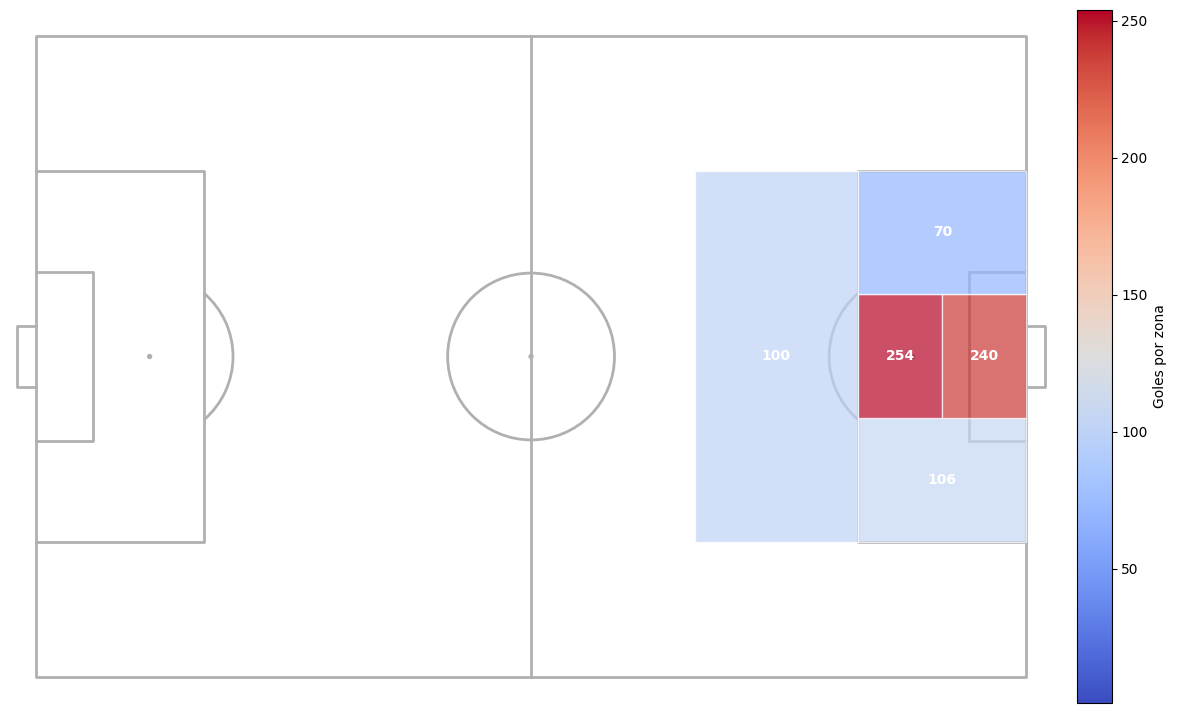

In [43]:
# Importar librerías necesarias
from statsbombpy import sb
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch, VerticalPitch

# Definir zonas del campo
zone_areas = {
    'zone_17a': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 40.43
    },
    'zone_17b1': {  # LADO IZQUIERDO
        'x_lower_bound': 83, 'x_upper_bound': 91.5,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17b2': {  # LADO DERECHO
        'x_lower_bound': 91.5, 'x_upper_bound': 100,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17c': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 59.76, 'y_upper_bound': 78.9
    },
    'zone_14': {
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9
    },
}

# Asegurate de que las coordenadas estén en escala Opta (0 a 100)
# Si tus datos vienen en StatsBomb (0-120 x, 0-80 y), transformalos:
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

# Aplicar la función para obtener la zona
remates['zona'] = remates.apply(lambda row: assign_shot_zone(row['x_opta'], row['y_opta']), axis=1)
 
 
# Función para asignar zonas
def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if (x >= bounds['x_lower_bound']) and (x <= bounds['x_upper_bound']):
            if (y >= bounds['y_lower_bound']) and (y <= bounds['y_upper_bound']):
                return zone
    return 'zona desconocida'

# Filtrar remates con pie derecho
remates_derecha = remates[remates['players_foot'] == 'left']

# Luego agrupar y contar goles y remates en esas condiciones
zonas_stats = remates_derecha.groupby('zona').agg(
    remates_totales=('zona', 'count'),
    goles=('goal', 'sum')
).reset_index()

# Ahora sí creas el diccionario
goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = plt.subplot(111)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map
cmap = plt.cm.coolwarm
vmin = zonas_stats['goles'].min()
vmax = zonas_stats['goles'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Pintar cada zona
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)  # Si no hay datos, usa 0
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)),
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
    
    # Texto con goles
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{goles}",
        color='white',
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Goles por zona', color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
plt.show()


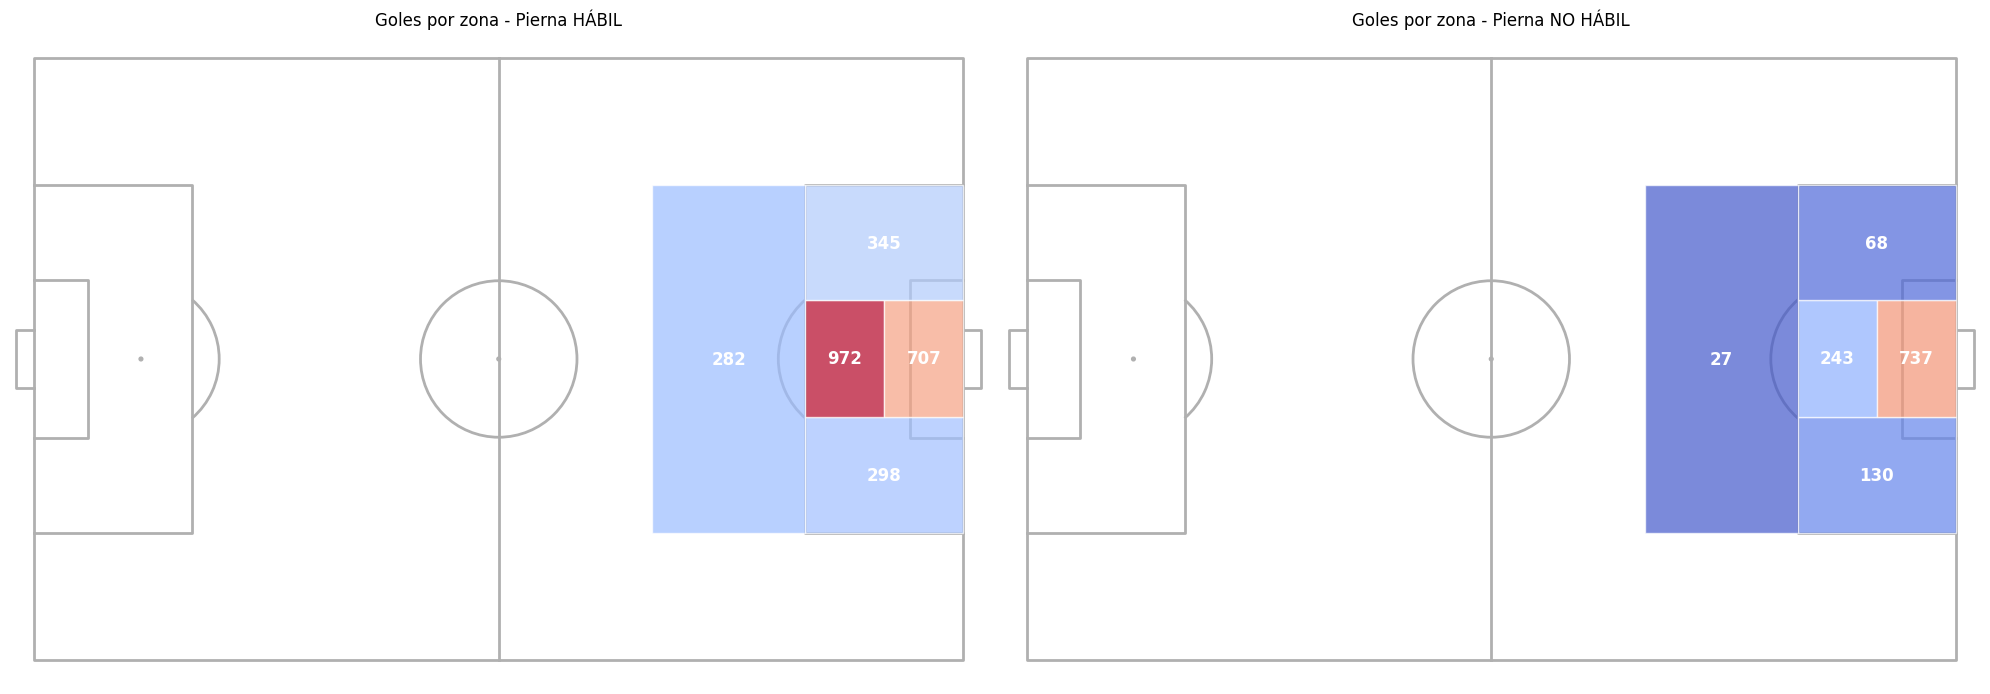

In [44]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch

# ===========================
# Definición de zonas
# ===========================
zone_areas = {
    'zone_17a': {'x_lower_bound': 83, 'x_upper_bound': 100, 'y_lower_bound': 21.1, 'y_upper_bound': 40.43},
    'zone_17b1': {'x_lower_bound': 83, 'x_upper_bound': 91.5, 'y_lower_bound': 40.43, 'y_upper_bound': 59.76},
    'zone_17b2': {'x_lower_bound': 91.5, 'x_upper_bound': 100, 'y_lower_bound': 40.43, 'y_upper_bound': 59.76},
    'zone_17c': {'x_lower_bound': 83, 'x_upper_bound': 100, 'y_lower_bound': 59.76, 'y_upper_bound': 78.9},
    'zone_14': {'x_lower_bound': 66.5, 'x_upper_bound': 83, 'y_lower_bound': 21.1, 'y_upper_bound': 78.9},
}

def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if (bounds['x_lower_bound'] <= x <= bounds['x_upper_bound']) and (bounds['y_lower_bound'] <= y <= bounds['y_upper_bound']):
            return zone
    return 'zona desconocida'

# ===========================
# Procesamiento de datos
# ===========================
# Escalar coordenadas a escala Opta
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

# Asignar zonas
remates['zona'] = remates.apply(lambda row: assign_shot_zone(row['x_opta'], row['y_opta']), axis=1)

# Extraer 'left' o 'right' del shot_body_part
remates['players_foot'] = remates['shot_body_part'].str.lower().str.extract(r'(left|right)')

# Filtrar remates con el pie
remates_pie = remates[remates['players_foot'].notna()]

# Inferir pierna hábil por jugador
pierna_habil_inferida = remates_pie.groupby('player')['players_foot'].agg(lambda x: x.mode()[0])
remates['dominant_foot'] = remates['player'].map(pierna_habil_inferida)

# Comparar si el tiro fue con la pierna hábil
remates['con_pierna_habil'] = remates['players_foot'] == remates['dominant_foot']

# Filtrar remates con y sin pierna hábil
remates_habil = remates[remates['con_pierna_habil'] == True]
remates_no_habil = remates[remates['con_pierna_habil'] == False]

# ===========================
# Función para estadísticas
# ===========================
def get_stats(df):
    return df.groupby('zona').agg(
        remates_totales=('zona', 'count'),
        goles=('goal', 'sum')
    ).reset_index()

stats_habil = get_stats(remates_habil)
stats_no_habil = get_stats(remates_no_habil)

goles_habil = dict(zip(stats_habil['zona'], stats_habil['goles']))
goles_no_habil = dict(zip(stats_no_habil['zona'], stats_no_habil['goles']))

# ===========================
# Visualización
# ===========================
fig, axs = plt.subplots(1, 2, figsize=(20, 9))

pitch_habil = Pitch(pitch_type='opta', goal_type='box')
pitch_no_habil = Pitch(pitch_type='opta', goal_type='box')

pitch_habil.draw(ax=axs[0])
pitch_no_habil.draw(ax=axs[1])

cmap = plt.cm.coolwarm
vmax_global = max(stats_habil['goles'].max(), stats_no_habil['goles'].max())
norm = plt.Normalize(vmin=0, vmax=vmax_global)

# Graficar - Pierna hábil
for zone, bounds in zone_areas.items():
    goles = goles_habil.get(zone, 0)
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)), alpha=0.7, ec='white'
    )
    axs[0].add_patch(rect)
    axs[0].text(
        (bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        (bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        str(goles), color='white', ha='center', va='center', fontsize=12, weight='bold'
    )
axs[0].set_title('Goles por zona - Pierna HÁBIL')

# Graficar - Pierna no hábil
for zone, bounds in zone_areas.items():
    goles = goles_no_habil.get(zone, 0)
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)), alpha=0.7, ec='white'
    )
    axs[1].add_patch(rect)
    axs[1].text(
        (bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        (bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        str(goles), color='white', ha='center', va='center', fontsize=12, weight='bold'
    )
axs[1].set_title('Goles por zona - Pierna NO HÁBIL')

plt.tight_layout()
plt.show()


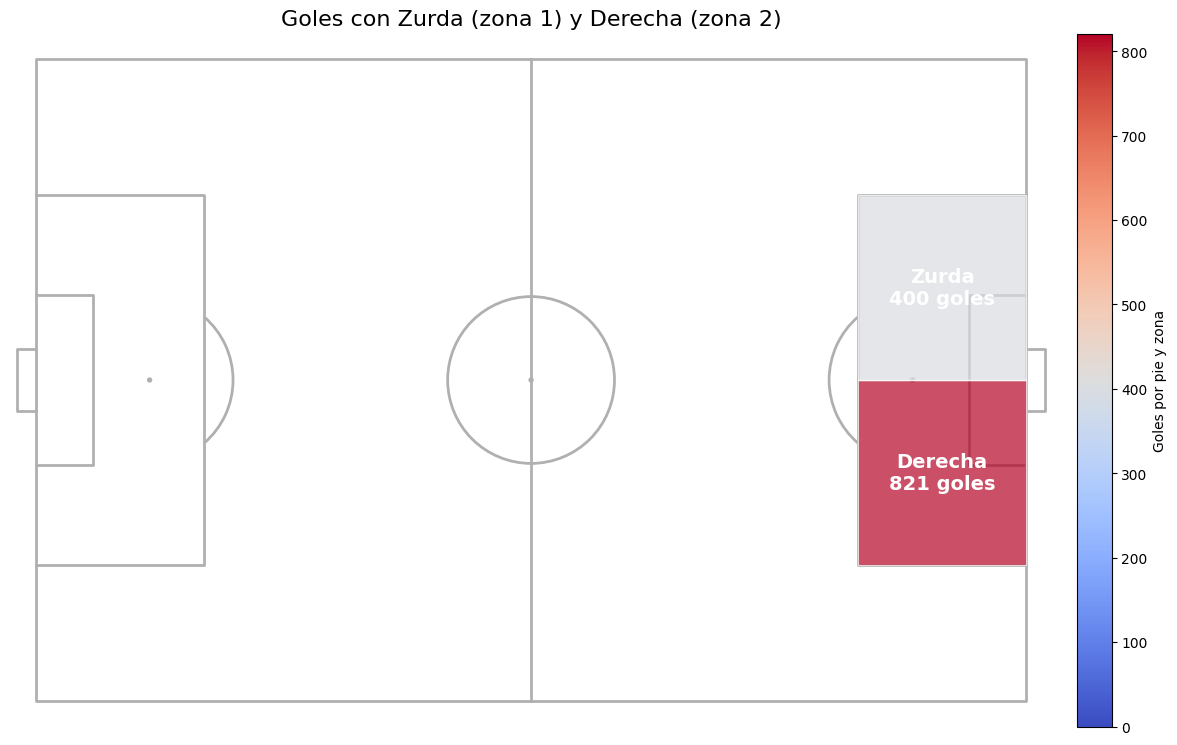

In [45]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch

# Definir zonas horizontales (2 zonas)
zone_areas = {
    'zone_1': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 50
    },
    'zone_2': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 50, 'y_upper_bound': 78.9
    },
}

def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if bounds['x_lower_bound'] <= x <= bounds['x_upper_bound'] and bounds['y_lower_bound'] <= y <= bounds['y_upper_bound']:
            return zone
    return 'zona desconocida'

# Escalar coordenadas StatsBomb a Opta (0-100)
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

# Aplicar asignación de zona
remates['zona'] = remates.apply(lambda row: assign_shot_zone(row['x_opta'], row['y_opta']), axis=1)

# Filtrar remates por pie y zona correspondiente
remates_zurda = remates[(remates['players_foot'] == 'right') & (remates['zona'] == 'zone_1')]
remates_derecha = remates[(remates['players_foot'] == 'left') & (remates['zona'] == 'zone_2')]

# Contar goles por zona
goles_zurda = remates_zurda['goal'].sum()
goles_derecha = remates_derecha['goal'].sum()

# Preparar stats para pintar (asumimos 0 en la zona que no corresponde)
zonas_stats = pd.DataFrame({
    'zona': ['zone_1', 'zone_2'],
    'goles': [goles_zurda, goles_derecha]
})

goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map para los goles
cmap = plt.cm.coolwarm
vmin = 0
vmax = max(goles_zurda, goles_derecha)
norm = plt.Normalize(vmin=vmin, vmax=vmax if vmax > 0 else 1)  # evitar div/0 si no hay goles

# Pintar las dos zonas
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)),
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
    
    # Texto con goles
    texto_pie = "Zurda" if zone == 'zone_2' else "Derecha"
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{texto_pie}\n{goles} goles",
        color='white',
        ha='center',
        va='center',
        fontsize=14,
        weight='bold'
    )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Goles por pie y zona', color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

plt.title("Goles con Zurda (zona 1) y Derecha (zona 2)", fontsize=16)
plt.show()
